In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model

In [2]:
# reading datset file
ds = pd.read_csv('C_Property_stolen_and_recovered.csv')
ds

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937
5,Chandigarh,2001,Burglary - Property,3. Burglary,119,364,1804823,10217378
6,Chhattisgarh,2001,Burglary - Property,3. Burglary,1169,4144,6518261,30457033
7,Dadra & Nagar Haveli,2001,Burglary - Property,3. Burglary,10,34,247140,1333389
8,Daman & Diu,2001,Burglary - Property,3. Burglary,7,43,479300,2084845
9,Delhi,2001,Burglary - Property,3. Burglary,642,3029,39632177,150033824


In [3]:
ds.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937


In [4]:
# Checking the columns of property dataset
ds.columns

Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Cases_Property_Recovered', 'Cases_Property_Stolen',
       'Value_of_Property_Recovered', 'Value_of_Property_Stolen'],
      dtype='object')

In [5]:
ds.dtypes

Area_Name                      object
Year                            int64
Group_Name                     object
Sub_Group_Name                 object
Cases_Property_Recovered        int64
Cases_Property_Stolen           int64
Value_of_Property_Recovered     int64
Value_of_Property_Stolen        int64
dtype: object

In [6]:
# Checking the unique values of Area_Name
ds['Area_Name'].unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [7]:
# Checking the unique values of error
ds['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
      dtype=int64)

In [8]:
# Checking the unique values of Group_Name
ds['Group_Name'].unique()

array(['Burglary - Property', 'Criminal Breach of Trust - Property',
       'Dacoity -Property', 'Other heads of Property',
       'Robbery - Property', 'Theft - Property', 'Total Property'],
      dtype=object)

In [9]:
# Chceking the unique values of Sub_Group_Name
ds['Sub_Group_Name'].unique()

array(['3. Burglary', '5. Criminal Breach of Trust', '1. Dacoity',
       '6. Other Property', '2. Robbery', '4. Theft',
       '7. Total Property Stolen & Recovered'], dtype=object)

In [10]:
#Checking the datatypes of various features of dataset
ds.dtypes

Area_Name                      object
Year                            int64
Group_Name                     object
Sub_Group_Name                 object
Cases_Property_Recovered        int64
Cases_Property_Stolen           int64
Value_of_Property_Recovered     int64
Value_of_Property_Stolen        int64
dtype: object

In [11]:
# Checking if null values are present in the dataset
ds.isnull().sum()

Area_Name                      0
Year                           0
Group_Name                     0
Sub_Group_Name                 0
Cases_Property_Recovered       0
Cases_Property_Stolen          0
Value_of_Property_Recovered    0
Value_of_Property_Stolen       0
dtype: int64

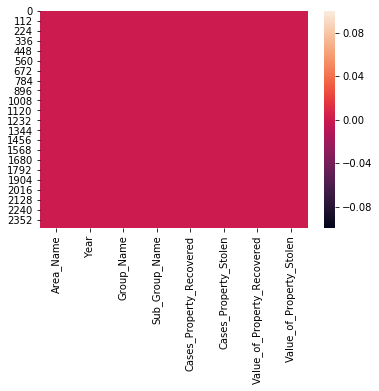

In [12]:
# Heatmap of null values
sns.heatmap(ds.isnull())
plt.show()

In [13]:
# Combining the Cases_Property_Recovered and Cases_Property_Stolen
ds['Total_Cases'] = ds['Cases_Property_Recovered'] + ds['Cases_Property_Stolen']

In [14]:
ds.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen,Total_Cases
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961,91
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348,10455
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904,314
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955,2962
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937,3598


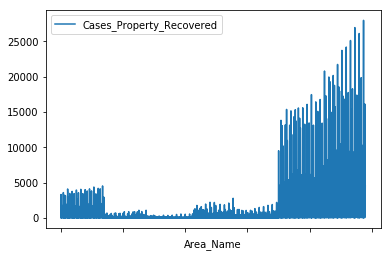

In [15]:
# Lineplot shows the 'Cases_Property_Recovered' in particular 'Area'
ds.plot(x='Area_Name', y='Cases_Property_Recovered', kind='line')
plt.show()

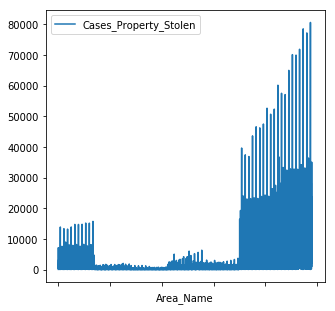

In [16]:
# Lineplot shows the 'Cases_Property_Stolen' in particular 'Area'
ds.plot(x='Area_Name', y='Cases_Property_Stolen',kind='line', figsize=(5, 5))
plt.show()

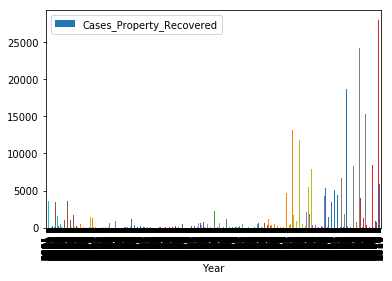

In [17]:
# Below barplot shows the 'Year' wise 'Cases_Property_Recovered'
ds.plot(kind='bar', x='Year', y='Cases_Property_Recovered')
plt.show()

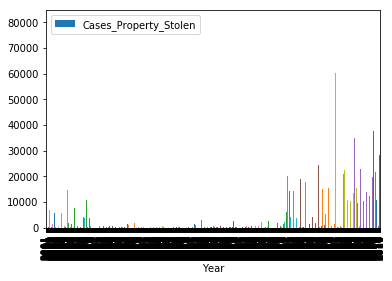

In [18]:
# Below barplot shows 'Year' wise 'Cases_Property_Stolen'
ds.plot(kind='bar', x='Year', y='Cases_Property_Stolen')
plt.show()

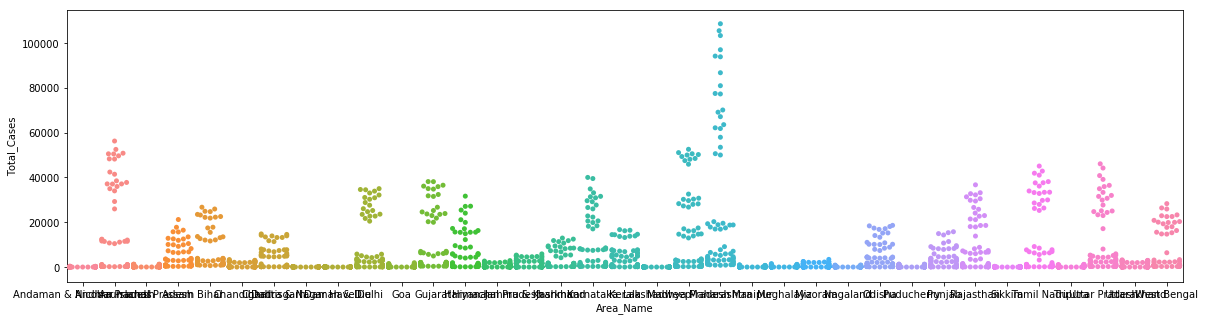

In [19]:
# Plotting the swarmplot which shows the 'Total Cases' of particular 'Area'
plt.figure(figsize=(20,5))
sns.swarmplot(x='Area_Name', y='Total_Cases', data=ds)
plt.show()

<Figure size 720x360 with 0 Axes>

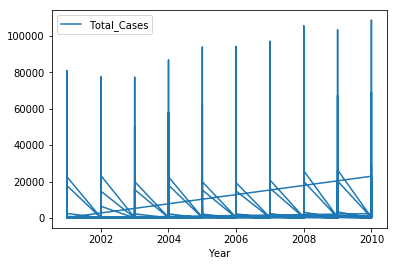

In [20]:
# Below lineplot show how cases vary with 'Year'
plt.figure(figsize=(10, 5))
ds.plot(x='Year', y='Total_Cases', kind='line')
plt.show()

<Figure size 720x360 with 0 Axes>

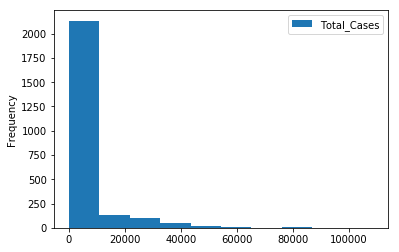

In [22]:
# Below graph shows the 'Total Cases' of 'Sub_Group_Name'
plt.figure(figsize=(10, 5))
ds.plot(x='Sub_Group_Name', y='Total_Cases',kind='hist')
plt.show()

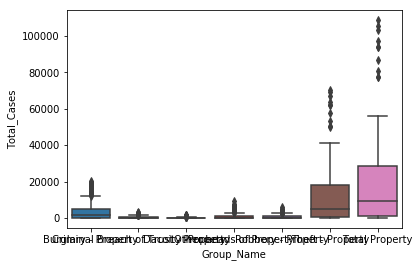

In [23]:
# Below graph shows 'Group_Name' wise 'Total_Cases'
sns.boxplot(x='Group_Name', y='Total_Cases', data=ds)
plt.show()

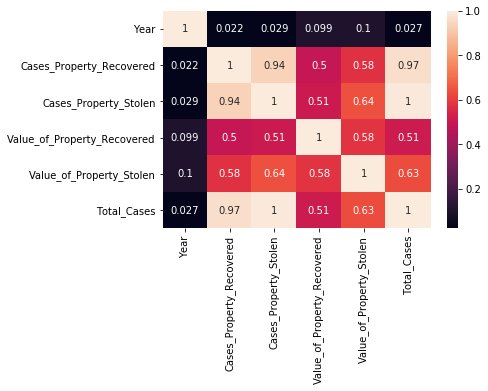

In [25]:
# Below heatmap shows the correlation among various features of property dataset
sns.heatmap(ds.corr(), annot=True)
plt.show()

In [26]:
# Statistical analysis of property dataset
ds.describe()

,Year,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen,Total_Cases
count,2449.000000,2449.000000,2449.000000,2.449000e+03,2.449000e+03,2449.000000
mean,2005.499388,1232.892201,3419.420988,5.859924e+07,2.465431e+08,4652.313189
std,2.873294,3079.573907,8136.256820,2.494403e+08,9.670035e+08,11071.400302
min,2001.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,2003.000000,13.000000,45.000000,6.845700e+05,3.649018e+06,63.000000
50%,2005.000000,113.000000,358.000000,5.851830e+06,2.701800e+07,486.000000
75%,2008.000000,722.000000,1875.000000,3.406395e+07,1.214580e+08,2626.000000
max,2010.000000,27960.000000,80663.000000,7.470011e+09,2.377625e+10,108623.000000


In [27]:
# Checking the skewness of data
ds.skew()

Year                            0.000582
Cases_Property_Recovered        4.180588
Cases_Property_Stolen           4.123731
Value_of_Property_Recovered    20.650682
Value_of_Property_Stolen       11.875169
Total_Cases                     4.086169
dtype: float64

In [28]:
ds.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen,Total_Cases
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961,91
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348,10455
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904,314
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955,2962
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937,3598


In [29]:
# Dropping the column 'Sub_Group_Name' as its not significant for Analysis
ds.drop(columns=['Sub_Group_Name'], inplace=True)

In [30]:
ds.head()

,Area_Name,Year,Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen,Total_Cases
0,Andaman & Nicobar Islands,2001,Burglary - Property,27,64,755858,1321961,91
1,Andhra Pradesh,2001,Burglary - Property,3321,7134,51483437,147019348,10455
2,Arunachal Pradesh,2001,Burglary - Property,66,248,825115,4931904,314
3,Assam,2001,Burglary - Property,539,2423,3722850,21466955,2962
4,Bihar,2001,Burglary - Property,367,3231,2327135,17023937,3598


In [31]:
#LabelEncoder is used to change thenon numerical data to numerical form
le = LabelEncoder()
ds['Area_Name'] = le.fit_transform(ds['Area_Name'])
ds['Group_Name'] = le.fit_transform(ds['Group_Name'])

In [32]:
ds.head()

,Area_Name,Year,Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen,Total_Cases
0,0,2001,0,27,64,755858,1321961,91
1,1,2001,0,3321,7134,51483437,147019348,10455
2,2,2001,0,66,248,825115,4931904,314
3,3,2001,0,539,2423,3722850,21466955,2962
4,4,2001,0,367,3231,2327135,17023937,3598


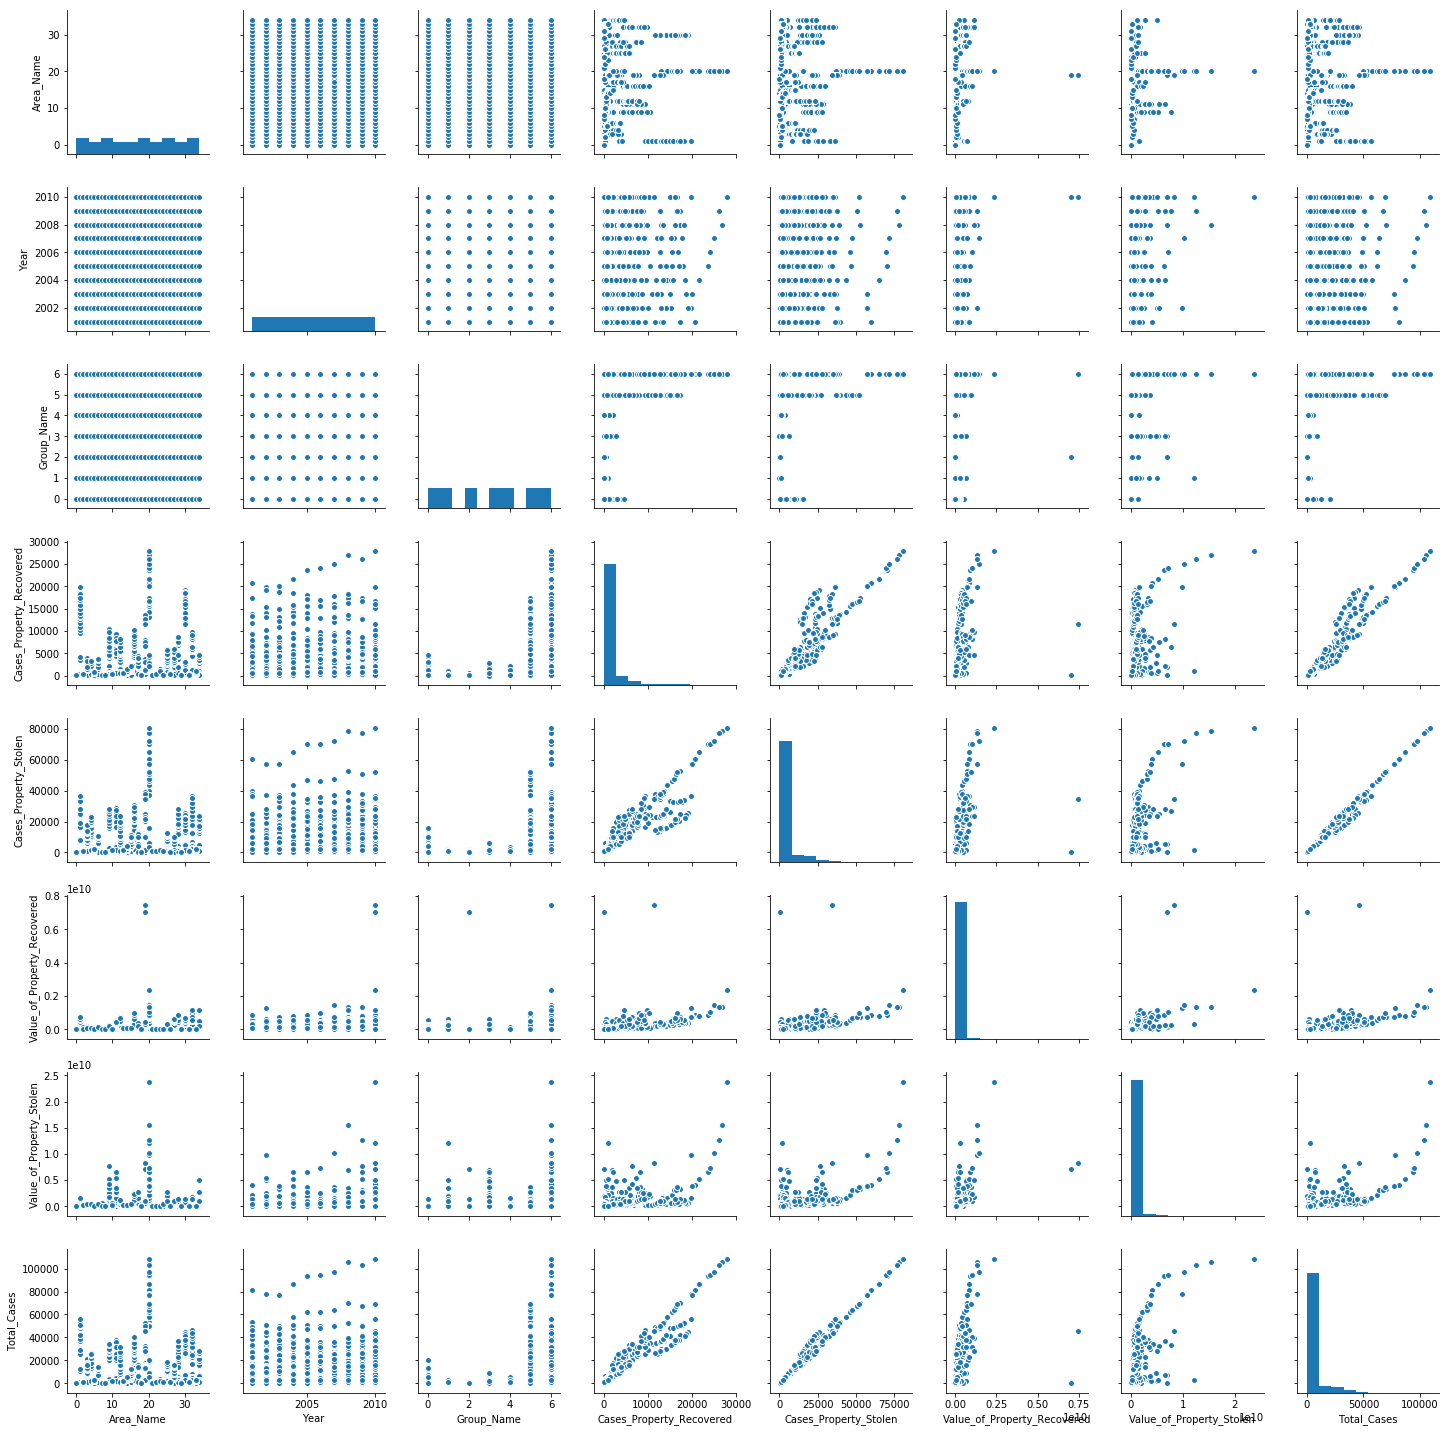

In [33]:
# Pairplot show the relationship between various features of the property dataset
sns.pairplot(ds)

In [34]:
# Removing skewness of data
for col in ds.columns:
    if ds.skew().loc[col] > 0.55:
        ds[col] = np.log1p(ds[col])


In [35]:
# Checking skewness after removing the skewness throgh log transform
ds.skew()

Area_Name                      0.000121
Year                           0.000582
Group_Name                     0.000459
Cases_Property_Recovered      -0.081131
Cases_Property_Stolen         -0.226742
Value_of_Property_Recovered   -1.851366
Value_of_Property_Stolen      -2.293602
Total_Cases                   -0.290960
dtype: float64

In [37]:
# CHecking the 'z score' / outliers of the dataset, if presnt, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(ds))
print ('Before removing zscore: ', ds.shape)

ds_final = ds.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", ds_final.shape)

Before removing zscore:  (2449, 8)
After removing zscore:  (2337, 8)


In [38]:
# Assigning the input and output data
df_x = ds_final.drop(columns = ['Total_Cases'])
y = ds_final['Total_Cases']

In [39]:
df_x.shape

(2337, 7)

In [40]:
y.shape

(2337,)

In [41]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [42]:
x.skew()

Area_Name                      0.009297
Year                          -0.002673
Group_Name                    -0.027056
Cases_Property_Recovered      -0.062198
Cases_Property_Stolen         -0.076536
Value_of_Property_Recovered   -2.059172
Value_of_Property_Stolen      -0.561618
dtype: float64

In [43]:
# Subroutine to get the best random state with max r2_score
max_r2_score = 0
for r_state in range (42, 100):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)
    
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test, y_pred)
    
    
    print ("\nr2 score corresponding to state: ", r_state, " is: ", r2_scr)
    if (r2_scr > max_r2_score):
        max_r2_score = r2_scr
        final_r_state = r_state
print ("\nMax r2 score corresponding to ", final_r_state, " is: ", max_r2_score)


r2 score corresponding to state:  42  is:  0.9989662634950789

r2 score corresponding to state:  43  is:  0.9993738241869892

r2 score corresponding to state:  44  is:  0.9994151603703011

r2 score corresponding to state:  45  is:  0.9994005626516884

r2 score corresponding to state:  46  is:  0.9994212239789726

r2 score corresponding to state:  47  is:  0.9993137996548559

r2 score corresponding to state:  48  is:  0.9994175250355234

r2 score corresponding to state:  49  is:  0.9991329223311287

r2 score corresponding to state:  50  is:  0.9992686079433772

r2 score corresponding to state:  51  is:  0.9991633571937623

r2 score corresponding to state:  52  is:  0.9993761599806251

r2 score corresponding to state:  53  is:  0.9993950539230352

r2 score corresponding to state:  54  is:  0.998972701832752

r2 score corresponding to state:  55  is:  0.999331393847031

r2 score corresponding to state:  56  is:  0.9993168834589211

r2 score corresponding to state:  57  is:  0.99917114926

In [44]:
# Further chceking with cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(), x, y, cv=5, scoring="r2").mean()

0.9988561244021538

In [46]:
# Applying the algorithm with best random state
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=88, test_size=.20)
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [47]:
# Evaluate r2_score and RMSE
print("\n r2 score is: ", r2_score(y_test, y_pred))
print("\n RMSE is: ", np.sqrt(mean_squared_error(y_test, y_pred)))


 r2 score is:  0.999497721424055

 RMSE is:  0.057020115683316046


In [49]:
# Regularization: Using Ridge Regression
# GridSerachCV : to use the best parameters and best model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param = {'alpha': [0.1, 0.001, 0.0001, 1.0]}

grid = GridSearchCV(estimator = Ridge(), param_grid = param, scoring='r2')
d_mod = grid.fit(x,y)
print ("\n Best Params ", grid.best_params_)
print ("\n Best Score ", grid.best_score_)


 Best Params  {'alpha': 1.0}

 Best Score  0.9986365876486134


In [50]:
# Using Ridge for Regularization, to remove variance and biasedness

rg = Ridge(alpha = 0.0001, normalize=True)

print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

rg.fit(x_train, y_train)
print ("\n Predicted value: ", rg.predict(x_test))
rg_pred = rg.predict(x_test)

print ("\n Score: ", rg.score(x_train, y_train))
print ("\n Coef: ", rg.coef_)
print ("\n Intercept: ", rg.intercept_)

#plt.bar (x, ls.coef_)
#plt.show()
rg.coef_.shape

(1869, 7)
(1869,)
(468, 7)
(468,)

 Predicted value:  [ 5.33397647  7.06201021  6.50946699  6.37778053  7.2335237   2.02542573
  6.4759919   6.815288    9.84951039  4.29776289  2.44173797  3.85594678
  3.70010312  5.68354796  7.74706689  9.95144034  7.95631125  5.97056161
  5.38904408  2.78070517  5.40373867  3.60558475 10.41023685  7.11821272
  9.36038429  7.87620947  6.60092374  1.46163265  7.03743151  8.84271221
  6.88075474  8.93035861  4.07321614  7.925676    9.48143105  4.99972164
  2.35857923  5.25926212  9.34995078  4.10285019  2.47898522  7.59761538
  8.5468455   2.03363768  5.65903299  8.10186571  2.86658114  2.4400326
  7.52464933  9.11244743  5.43723441  2.38255706  1.48894672  5.55934923
  6.39332889  5.78323149  3.64948022  1.90486881  8.0236873   6.00351539
 10.52348236  2.29194081  6.47637012  5.569415    6.12303051  6.6411352
  9.37683738  9.93624113  8.1308959   2.85273068  7.08121899  6.76554175
  2.02237747  8.79125712  8.57876257  7.48262713  6.02594672  1.17088871

(7,)

In [51]:
from sklearn.externals import joblib
joblib.dump(lr, 'Prj_crime_property.pkl')
clf = joblib.load('Prj_crime_property.pkl')
clf.predict(x_test)

array([ 5.33395124,  7.06144238,  6.50990735,  6.37711475,  7.23360923,
        2.02538663,  6.47637306,  6.81508837,  9.85007914,  4.29905704,
        2.44084479,  3.85567418,  3.70077013,  5.68256887,  7.74678422,
        9.9516995 ,  7.9564576 ,  5.97152157,  5.39037036,  2.78077533,
        5.40432045,  3.60563613, 10.4104924 ,  7.11815194,  9.36127605,
        7.87601256,  6.60114228,  1.46054724,  7.03794052,  8.84314254,
        6.88092963,  8.93038042,  4.07243844,  7.92638719,  9.48204601,
        4.99859993,  2.35862418,  5.25853249,  9.34994473,  4.10191982,
        2.47968668,  7.59745413,  8.5475129 ,  2.03281722,  5.65844093,
        8.10188367,  2.86556558,  2.4395776 ,  7.52430399,  9.11205158,
        5.4373438 ,  2.3831282 ,  1.48886061,  5.5587759 ,  6.39402669,
        5.78383704,  3.64931777,  1.90465788,  8.02374177,  6.00318072,
       10.52379788,  2.29151625,  6.47621315,  5.57050442,  6.12217074,
        6.64152137,  9.37728921,  9.93652885,  8.13063438,  2.85